In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# !pip install missingno
import missingno as msno
import matplotlib as mpl
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['figure.figsize'] = [25, 10]


In [3]:
df = pd.read_csv('household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

In [4]:
df.shape

(2075259, 7)

In [5]:
# Display the last 5 rows of the data
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
# Get the information about the dataframe
print("\nInformation about the dataframe:")
print(df.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB
None


we find our target variable, y to be (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3)

In [7]:
df['total_energy_consumption'] = df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']

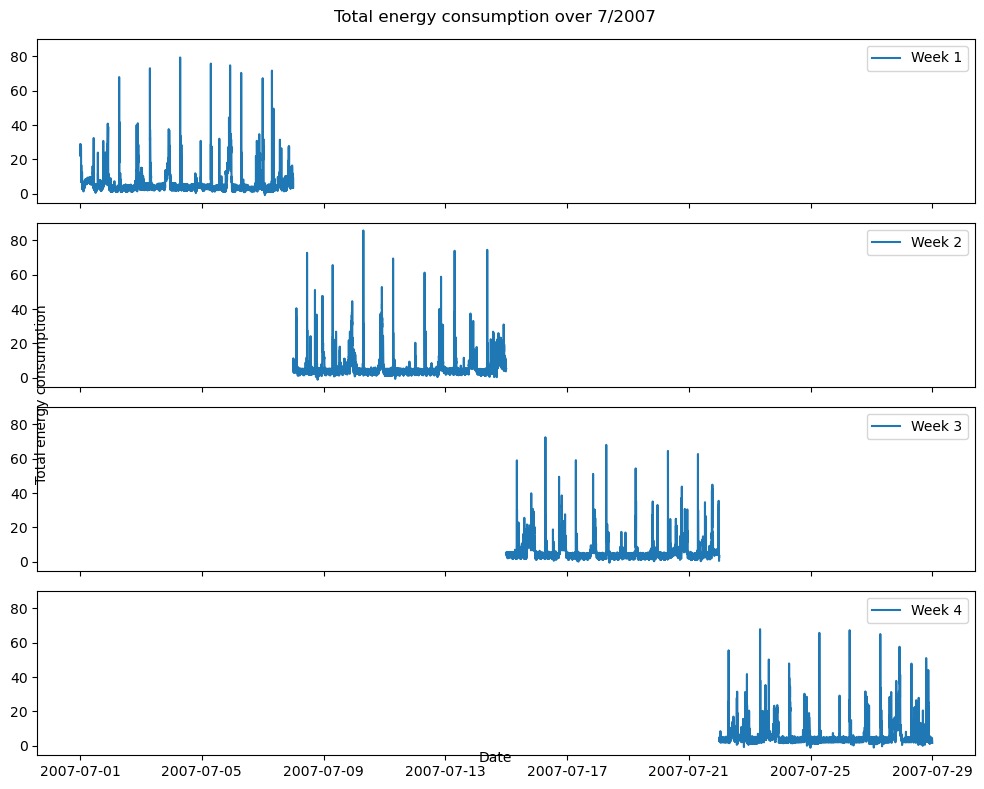

In [10]:
# Define a function to plot the total energy consumption over a given month
def plot_monthly_consumption(month, year):
  # Filter the data for the given month and year
  df_month = df.loc[(df.index.month == month) & (df.index.year == year)]
  # Resample the data by week and calculate the mean
  df_week = df_month.resample('W').mean()
  # Create a subplot with four rows and one column
  fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True, sharey=True)
  # Loop over the four weeks and plot the data
  for i in range(4):
    # Get the start and end dates of the week
    start = df_week.index[i]
    end = df_week.index[i+1]
    # Filter the data for the week
    df_weekly = df_month.loc[start:end]
    # Plot the data on the corresponding axis
    axes[i].plot(df_weekly.index, df_weekly['total_energy_consumption'])
    # Add a legend with the week number
    axes[i].legend([f'Week {i+1}'])
  # Add a title with the month and year
  fig.suptitle(f'Total energy consumption over {month}/{year}')
  # Add a common x-axis label
  fig.text(0.5, 0.04, 'Date', ha='center')
  # Add a common y-axis label
  fig.text(0.04, 0.5, 'Total energy consumption', va='center', rotation='vertical')
  # Adjust the spacing between subplots
  plt.tight_layout()
  # Show the plot
  plt.show()

# Plot the total energy consumption over January 1981
plot_monthly_consumption(7, 2007)


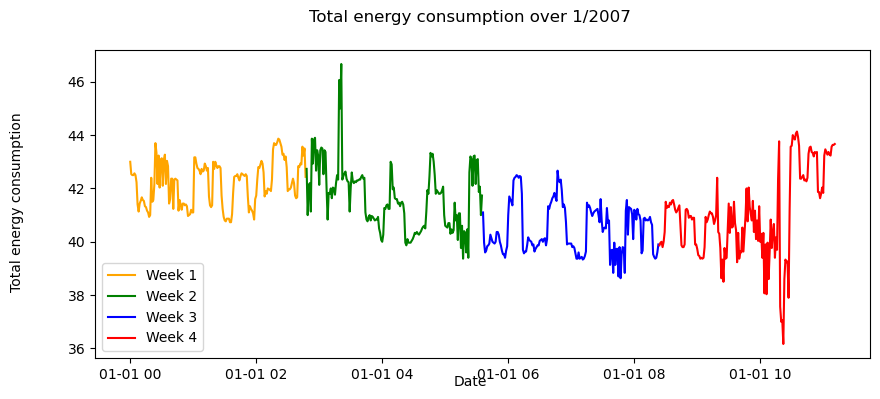

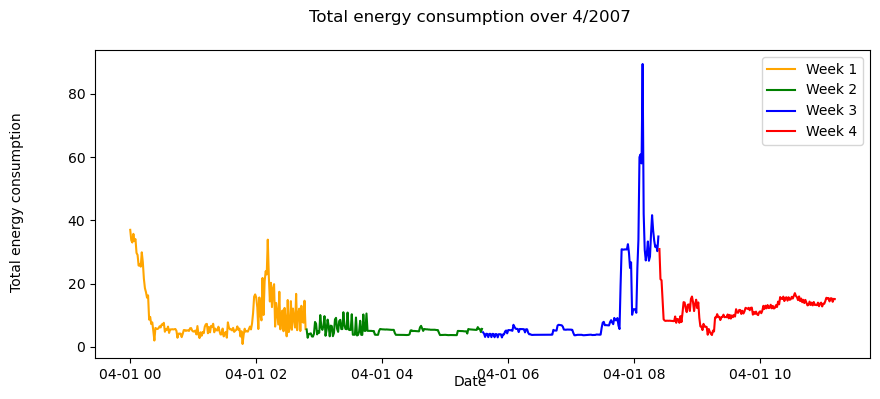

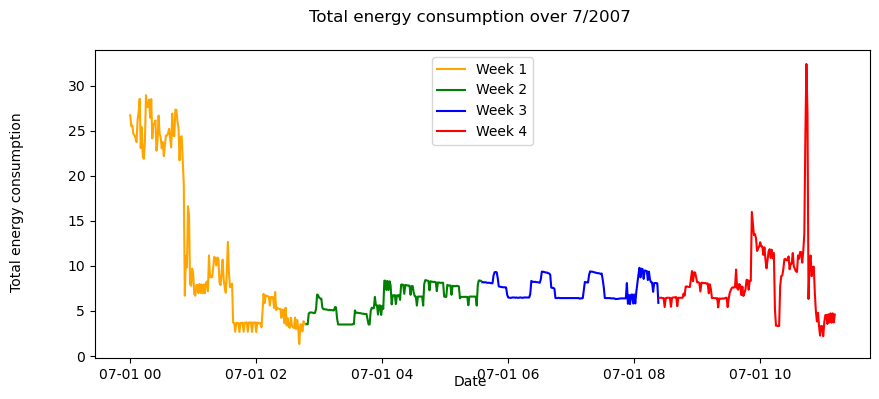

In [17]:
# Define a function to plot the total energy consumption over a given month
def plot_monthly_consumption(month, year):
  # Filter the data for the given month and year
  df_month = df.loc[(df.index.month == month) & (df.index.year == year)]
  # Create a single plot with one row and one column
  fig, ax = plt.subplots(1, 1, figsize=(10, 4))
  # Loop over the four weeks and plot the data on the same axis, with different colors and labels
  for i in range(4):
    # Get the start and end dates of the week
    start = df_month.index[i*7*24]
    end = df_month.index[(i+1)*7*24-1]
    # Filter the data for the week
    df_weekly = df_month.loc[start:end]
    # Plot the data on the same axis, with different colors and labels
    ax.plot(df_weekly.index, df_weekly['total_energy_consumption'], color=['orange', 'green', 'blue', 'red'][i], label=f'Week {i+1}')
  # Add a title with the month and year
  fig.suptitle(f'Total energy consumption over {month}/{year}')
  # Add a common x-axis label
  fig.text(0.5, 0.04, 'Date', ha='center')
  # Add a common y-axis label
  fig.text(0.04, 0.5, 'Total energy consumption', va='center', rotation='vertical')
  # Add a legend
  plt.legend()
  # Show the plot
  plt.show()

# Plot the total energy consumption over January 1981
plot_monthly_consumption(1, 2007)
plot_monthly_consumption(4, 2007)
plot_monthly_consumption(7, 2007)

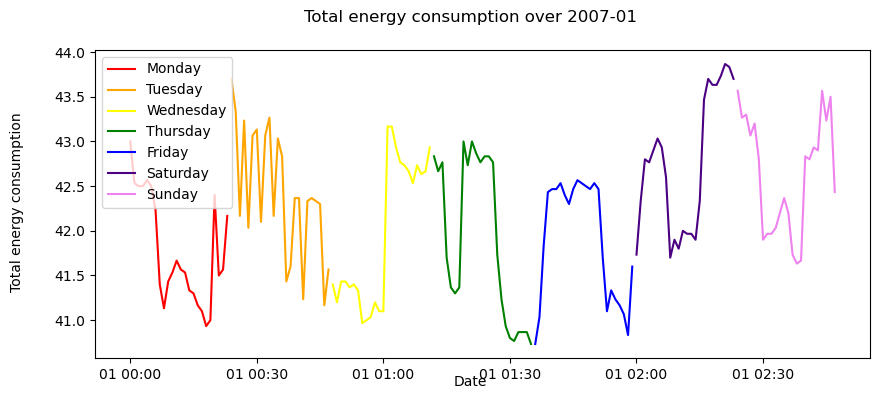

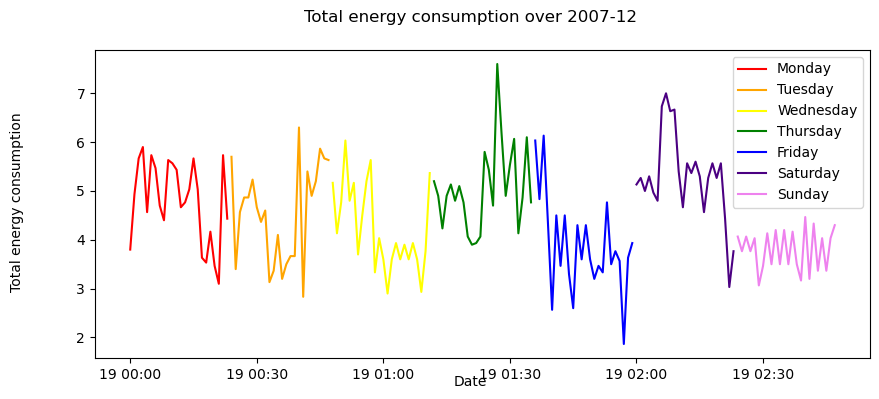

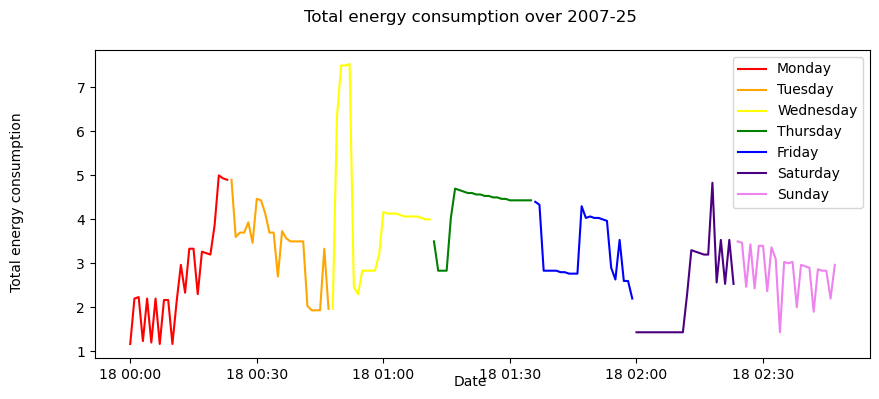

In [23]:
import calendar
# Define a function to plot the total energy consumption over a given week
def plot_weekly_consumption(week, year):
  # Filter the data for the given week and year
  df_week = df.loc[(df.index.isocalendar().week == week) & (df.index.isocalendar().year == year)]
  # Create a single plot with one row and one column
  fig, ax = plt.subplots(1, 1, figsize=(10, 4))
  # Loop over the seven days and plot the data on the same axis, with different colors and labels
  for i in range(7):
    # Get the start and end dates of the day
    start = df_week.index[i*24]
    end = df_week.index[(i+1)*24-1]
    # Filter the data for the day
    df_daily = df_week.loc[start:end]
    # Plot the data on the same axis, with different colors and labels
    ax.plot(df_daily.index, df_daily['total_energy_consumption'], color=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'][i], label=calendar.day_name[i])
  # Add a title with the week and year
  fig.suptitle(f'Total energy consumption over {start.strftime("%Y-%W")}')
  # Add a common x-axis label
  fig.text(0.5, 0.04, 'Date', ha='center')
  # Add a common y-axis label
  fig.text(0.04, 0.5, 'Total energy consumption', va='center', rotation='vertical')
  # Add a legend
  plt.legend()
  # Show the plot
  plt.show()

# Plot the total energy consumption over the first week of 1981
plot_weekly_consumption(1, 2007)
plot_weekly_consumption(12, 2007)
plot_weekly_consumption(25, 2007)

In [ ]:
n = 1
plt.subplot(3,1,1)
df.iloc[:n*60*24*7, -1].plot()
df.iloc[n*60*24*7:n*60*24*7*2, -1].plot()
df.iloc[n*60*24*7*2:n*60*24*7*3, -1].plot()
df.iloc[n*60*24*7*3:n*60*24*7*4, -1].plot()
plt.title(f'Total energy consumption over {n}th month')
plt.legend(labels = ['1st week', '2nd week', '3rd week', '4th week']);

n = 10
plt.subplot(3,1,2)
df.iloc[:n*60*24*7, -1].plot()
df.iloc[n*60*24*7:n*60*24*7*2, -1].plot()
df.iloc[n*60*24*7*2:n*60*24*7*3, -1].plot()
df.iloc[n*60*24*7*3:n*60*24*7*4, -1].plot()
plt.title(f'Total energy consumption over {n}th month')
plt.legend(labels = ['1st week', '2nd week', '3rd week', '4th week']);


n = 50
plt.subplot(3,1,3)
df.iloc[:n*60*24*7, -1].plot()
df.iloc[n*60*24*7:n*60*24*7*2, -1].plot()
df.iloc[n*60*24*7*2:n*60*24*7*3, -1].plot()
df.iloc[n*60*24*7*3:n*60*24*7*4, -1].plot()
plt.title(f'Total energy consumption over {n}th month')
plt.legend(labels = ['1st week', '2nd week', '3rd week', '4th week']);

This seasonlaity diagram tells us that the seasonality is not weekly. XD

Let's try daily

In [ ]:
n = 1
plt.subplot(3,1,1)
df.iloc[:n*60*24, -1].plot()
df.iloc[n*60*24:n*60*24*2, -1].plot()
df.iloc[n*60*24*2:n*60*24*3, -1].plot()
df.iloc[n*60*24*3:n*60*24*4, -1].plot()
df.iloc[n*60*24*4:n*60*24*5, -1].plot()
df.iloc[n*60*24*6:n*60*24*7, -1].plot()
df.iloc[n*60*24*7:n*60*24*8, -1].plot()
plt.title(f'Total energy consumption over {n}th week')
plt.legend(loc = 'upper right', labels = ['1st day', '2nd day', '3rd day', '4th day', '5th day', '6th day', '7th day']);

n = 50
plt.subplot(3,1,2)
df.iloc[:n*60*24, -1].plot()
df.iloc[n*60*24:n*60*24*2, -1].plot()
df.iloc[n*60*24*2:n*60*24*3, -1].plot()
df.iloc[n*60*24*3:n*60*24*4, -1].plot()
df.iloc[n*60*24*4:n*60*24*5, -1].plot()
df.iloc[n*60*24*6:n*60*24*7, -1].plot()
df.iloc[n*60*24*7:n*60*24*8, -1].plot()
plt.title(f'Total energy consumption over {n}th week')
plt.legend(loc = 'upper right', labels = ['1st day', '2nd day', '3rd day', '4th day', '5th day', '6th day', '7th day']);

n = 150
plt.subplot(3,1,3)
df.iloc[:n*60*24, -1].plot()
df.iloc[n*60*24:n*60*24*2, -1].plot()
df.iloc[n*60*24*2:n*60*24*3, -1].plot()
df.iloc[n*60*24*3:n*60*24*4, -1].plot()
df.iloc[n*60*24*4:n*60*24*5, -1].plot()
df.iloc[n*60*24*6:n*60*24*7, -1].plot()
df.iloc[n*60*24*7:n*60*24*8, -1].plot()
plt.title(f'Total energy consumption over {n}th week')
plt.legend(loc = 'upper right', labels = ['1st day', '2nd day', '3rd day', '4th day', '5th day', '6th day', '7th day']);

In [ ]:
# create a copy of original data frame to do some additional exploration
df_new = df.copy()

Checking for missing values

In [ ]:
df_new.isnull().index

In [ ]:
pd.Series(df[df.isnull()].index.year).value_counts().plot(kind='bar')
plt.title('Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

In [ ]:
plt.figure(figsize = (25,10))
msno.matrix(df, color=(0.2, 0.4, 0.6));
plt.title('Missing Values Matrix', fontweight = 'bold')
plt.ylabel('Observations present/missing in data', fontweight = 'bold')
plt.xlabel('Variables in the data', fontweight = 'bold')
plt.show()


In [ ]:
# Create a heatmap of the missing values
sns.heatmap(df.isna(), cmap='YlGnBu', cbar=False);
plt.title('Missing Values')
plt.xlabel('Columns')
plt.ylabel('Date')
plt.show()

Handling missing values

In [ ]:
df_new = df_new.fillna(df_new.resample('D').mean().apply('median'))

Resampling

In [ ]:
df_daily = df_new.resample('D').mean()
df_hourly = df_new.resample('H').mean()
df_monthly = df_new.resample('M').mean()
df_weekly = df_new.resample('W').mean()
df_yearly = df_new.resample('Y').mean()

In [ ]:
print(df_daily.head(2))
print(df_hourly.head(2))
print(df_daily.shape, df_hourly.shape)

In [ ]:
# plot the col variable for the different resampled versions of the data to see how the resampling affects it.
plt.figure(figsize=(20, 20))
# use 3 rows and 2 columns of subplots
for n, col in enumerate(df.columns):
    plt.subplot(4,2,n+1)
    # use different colors and line styles for each frequency
    plt.plot(df_new[col], color='blue', linestyle='-', label = 'minutely', alpha = 1)
    plt.plot(df_hourly[col], color='orange', linestyle='--', label = 'hourly', alpha = 0.8)
    plt.plot(df_daily[col], color='green', linestyle='-.', label = 'daily', alpha = 0.5)
    plt.plot(df_weekly[col], color='red', linestyle=':', label = 'weekly', alpha = 0.5)
    plt.plot(df_monthly[col], color='purple', linestyle='-', label = 'monthly', alpha = 0.5)
    plt.plot(df_yearly[col], color='brown', linestyle='--', label = 'yearly', alpha = 0.5)
    plt.title(f'Resampling of {col}')
    plt.xticks(rotation = 90)
    plt.legend(loc='upper right')
# add some space between the subplots
plt.subplots_adjust(hspace=0.4, wspace=0.2)
# adjust the margins and spacing
plt.tight_layout()
plt.show()

In [ ]:
# # Create a figure and a grid of subplots
# fig, axes = plt.subplots(2, 4)
# # Loop over the column names and the axes objects
# for col, ax in zip(df.columns, axes.flat):
#     # Plot a displot for each column on each subplot
#     sns.histplot(data=df, x=col, kde=True, ax=ax)
# # Adjust the spacing and show the plot
# plt.tight_layout()
# plt.show()

In [ ]:
weekdays = {'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'}
df_new['weekday'] = df.index.day_name().map(weekdays)

In [ ]:
plt.figure(figsize =  (25, 50))
n = 5
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(x = df_new.index.dayofyear, 
                    y = df_new[names[i]]),
    plt.xticks([])
    plt.title('Daily Time Series Boxplots of {}'.format(names[i]));

In [ ]:
plt.figure(figsize =  (60, 60))
n = 3
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(n):
    plt.subplot(n,1,i+1)
    sns.boxplot(x = df_new.index.dayofyear, 
                y = df_new[names[i]],
                hue = df_new['weekday'],
                palette = ['white', 'orange'])
    plt.xticks([])
    plt.title('Daily Time Series Boxplots of {} by Weekday/Weekend'.format(names[i]))
plt.show()

In [ ]:
plt.figure(figsize =  (25, 50))
n = 5
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(x = df_new.index.weekday, 
                    y = df_new[names[i]]),
    plt.xticks(ticks = [0,1,2,3,4,5,6],labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']),
    plt.title('Weekday Time Series Boxplots of {}'.format(names[i])),
plt.show()

In [ ]:
plt.figure(figsize =  (25, 50)),
n = 5,
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(x = df_new.index.month, 
                    y = df_new[names[i]])
    plt.xticks(ticks = list(range(12)), labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.title('Monthly Time Series Boxplots of {}'.format(names[i]))
plt.show()

In [ ]:
plt.figure(figsize =  (25, 50))
n = 5
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(x = df_new.index.year, 
                    y = df_new[names[i]])
    plt.xticks(ticks = list(range(5)), labels = ['2006', '2007', '2008', '2009', '2010'])
    plt.title('Yearly Time Series Boxplots of {}'.format(names[i]))
plt.show()

In [ ]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
df_new['season'] = df.index.month.map(seasons)
df_new['year'] = df.index.year

In [ ]:
plt.figure(figsize =  (25, 50))
n = 5
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(x = df_new['season'],
                y = df_new[names[i]],
                hue = df_new['year'],
                order = ['Winter', 'Spring', 'Summer', 'Autumn'],
                hue_order = sorted(df_new['year'].unique()))
    plt.title('Seasonal Time Series Boxplots of {} by Year'.format(names[i]))
plt.show()

In [ ]:
plt.figure(figsize =  (25, 50))
n = 5
names = ['Global_active_power','total_energy_consumption', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for i in range(5):
    plt.subplot(5,1,i+1)
    sns.boxplot(x = df_new['season'], 
                y = df_new[names[i]],
                order = ['Winter', 'Spring', 'Summer', 'Autumn'])
    plt.title('Seasonal Time Series Boxplots of {} by Year'.format(names[i]))
plt.show()

In [ ]:
sns.heatmap(df_new.corr(numeric_only=True), annot=True);
plt.title('Correlation plot of Variables')

In [ ]:
stl = seasonal_decompose(df_new['total_energy_consumption'], period = 60*24*7*4*12)
fig = stl.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
stl = seasonal_decompose(df_daily['total_energy_consumption'], period = 7*4*12)
fig = stl.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
stl = seasonal_decompose(df_hourly['total_energy_consumption'], period = 7*4*12)
fig = stl.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
stl = seasonal_decompose(df_weekly['total_energy_consumption'], period = 4*12)
fig = stl.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
stl = seasonal_decompose(df_monthly['total_energy_consumption'], period = 12)
fig = stl.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
stl = seasonal_decompose(df_yearly['total_energy_consumption'], period = 1)
fig = stl.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
# Define a function to detect outliers based on standard deviation
def detect_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    outliers = []
    for i in range(len(data)):
        z_score = (data[i] - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [ ]:
# t = df_new.index
# y = df_new['total_energy_consumption']

# perods = [12, 24, 30]

# for i, period in enumerate(periods):
    
#     plt.subplots(1, 3, i+1)
#     # Perform STL decomposition
#     stl = STL(y, period=period, robust=True) # Assume a periodicity of 12
#     res = stl.fit()
#     res.plot() # Plot the decomposition results
#     plt.show()

#     # Extract the residual component
#     resid = res.resid

#     # Detect outliers in the residual component
#     outliers = detect_outliers(resid)
#     # print('Outlier indices:', outliers)

#     # Plot the original data with outliers marked
#     plt.figure()
#     plt.plot(t, y, label='Original data')
#     plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
#     plt.legend()
    
# plt.show()

In [ ]:
# t = df_hourly.index
# y = df_hourly['total_energy_consumption']


# perods = [24, 24*7, 24*7*4]

# for i, period in enumerate(periods):
    
#     plt.subplots(1, 3, i+1)
    
#     # Perform STL decomposition
#     stl = STL(y, period=period, robust=True) # Assume a periodicity of 12
#     res = stl.fit()
#     res.plot() # Plot the decomposition results
#     plt.show()

#     # Extract the residual component
#     resid = res.resid

#     outliers = detect_outliers(resid)

#     plt.figure()
#     plt.plot(t, y, label='hourly')
#     plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
#     plt.legend()

# plt.show()

In [ ]:
t = df_new.index
y = df_new['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=60*24, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='Original')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()
plt.show()

In [ ]:
t = df_hourly.index
y = df_hourly['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=24*7*4, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='hourly')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()

In [ ]:
t = df_daily.index
y = df_daily['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=7*4*12, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='daily')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()
plt.show()

In [ ]:
t = df_hourly.index
y = df_hourly['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=30, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='hourly')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()
plt.show()

In [ ]:
t = df_daily.index
y = df_daily['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=30, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='daily')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()
plt.show()

In [ ]:
t = df_weekly.index
y = df_weekly['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=30, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='weekly')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()
plt.show()

In [ ]:
t = df_monthly.index
y = df_monthly['total_energy_consumption']

# Perform STL decomposition
stl = STL(y, period=30, robust=True) # Assume a periodicity of 12
res = stl.fit()
res.plot() # Plot the decomposition results
plt.show()

# Extract the residual component
resid = res.resid

outliers = detect_outliers(resid)

plt.figure()
plt.plot(t, y, label='monthly')
plt.plot(t[outliers], y[outliers], 'ro', label='Outliers')
plt.legend()
plt.show()

In [ ]:
t = df_weekly.index
y = df_weekly['total_energy_consumption']

periods = [24*7, 24*7*4, 24*30]

# Create a 1x3 subplot layout
fig, ax = plt.subplots(1, 3)

for i, period in enumerate(periods):
    
    # Perform STL decomposition with robust=True
    res = STL(y, period=period, robust=True).fit()
    
    # Plot the decomposition results in the i-th subplot
    # Plot the trend component in the i-th subplot
    ax[i].plot(res.trend, label='Trend')
    # Plot the seasonal component in the same subplot
    ax[i].plot(res.seasonal, label='Seasonal')
    # Plot the residual component in the same subplot
    ax[i].plot(res.resid,'o', label='Residual')
    # Add a legend to the subplot
    ax[i].legend()

    
    # Extract the residual component and detect outliers
    resid = res.resid
    outliers = detect_outliers(resid)

    # Plot the original data and the outliers in the same subplot
    ax[i].plot(t, y, label='weekly')
    ax[i].plot(t[outliers], y[outliers], 'ro', label='Outliers')
    ax[i].legend()


In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of Global_active_power over day with different color
ax1.plot(df['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Global active power resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of Global_active_power over week with different color
ax2.plot(df['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Global active power resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax3.plot(df['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Global active power resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax4.plot(df['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Global active power resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of Global_active_power over month with different color
ax5.plot(df['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Global active power resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(22,20))
# Adjust the subplot spacing
fig.subplots_adjust(hspace=1)

# Create first subplot
ax1 = fig.add_subplot(5,1,1)
# Plot the resampled mean of total_energy_consumption over day with different color
ax1.plot(df['total_energy_consumption'].resample('D').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax1.set_title('Mean Total energy consumption resampled over day')
# Set major tick parameters for the subplot
ax1.tick_params(axis='both', which='major')

# Create second subplot
ax2 = fig.add_subplot(5,1,2, sharex=ax1)
# Plot the resampled mean of total_energy_consumption over week with different color
ax2.plot(df['total_energy_consumption'].resample('W').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax2.set_title('Mean Total energy consumption resampled over week')
# Set major tick parameters for the subplot
ax2.tick_params(axis='both', which='major')

# Create third subplot
ax3 = fig.add_subplot(5,1,3, sharex=ax1)
# Plot the resampled mean of total_energy_consumption over month with different color
ax3.plot(df['total_energy_consumption'].resample('M').mean(), linewidth=1, color='purple')
# Set the title for the subplot
ax3.set_title('Mean Total energy consumption resampled over month')
# Set major tick parameters for the subplot
ax3.tick_params(axis='both', which='major')

# Create third subplot
ax4  = fig.add_subplot(5,1,4, sharex=ax1)
# Plot the resampled mean of total_energy_consumption over month with different color
ax4.plot(df['total_energy_consumption'].resample('Q').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax4.set_title('Mean Total energy consumption resampled over quarter')
# Set major tick parameters for the subplot
ax4.tick_params(axis='both', which='major')


# Create third subplot
ax5  = fig.add_subplot(5,1,5, sharex=ax1)
# Plot the resampled mean of total_energy_consumption over month with different color
ax5.plot(df['total_energy_consumption'].resample('A').mean(),linewidth=1, color='purple')
# Set the title for the subplot
ax5.set_title('Mean Total energy consumption resampled over year')
# Set major tick parameters for the subplot
ax5.tick_params(axis='both', which='major')

In [ ]:
df.columns
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3', 'total_energy_consumption', 'year']
for col in numerical_cols:
# Create a figure with specified size
    fig = plt.figure(figsize=(22,20))
    # Adjust the subplot spacing
    fig.subplots_adjust(hspace=1)

    # Create first subplot
    ax1 = fig.add_subplot(5,1,1)
    # Plot the resampled mean of total_energy_consumption over day with different color
    ax1.plot(df[col].resample('D').mean(), linewidth=1, color='purple')
    # Set the title for the subplot
    ax1.set_title('Mean ' + col + ' resampled over day')
    # Set major tick parameters for the subplot
    ax1.tick_params(axis='both', which='major')

    # Create second subplot
    ax2 = fig.add_subplot(5,1,2, sharex=ax1)
    # Plot the resampled mean of total_energy_consumption over week with different color
    ax2.plot(df[col].resample('W').mean(), linewidth=1, color='purple')
    # Set the title for the subplot
    ax2.set_title('Mean ' + col + ' resampled over week')
    # Set major tick parameters for the subplot
    ax2.tick_params(axis='both', which='major')

    # Create third subplot
    ax3 = fig.add_subplot(5,1,3, sharex=ax1)
    # Plot the resampled mean of total_energy_consumption over month with different color
    ax3.plot(df[col].resample('M').mean(), linewidth=1, color='purple')
    # Set the title for the subplot
    ax3.set_title('Mean ' + col + ' resampled over month')
    # Set major tick parameters for the subplot
    ax3.tick_params(axis='both', which='major')

    # Create third subplot
    ax4  = fig.add_subplot(5,1,4, sharex=ax1)
    # Plot the resampled mean of total_energy_consumption over month with different color
    ax4.plot(df[col].resample('Q').mean(),linewidth=1, color='purple')
    # Set the title for the subplot
    ax4.set_title('Mean ' + col + ' resampled over quarter')
    # Set major tick parameters for the subplot
    ax4.tick_params(axis='both', which='major')


    # Create third subplot
    ax5  = fig.add_subplot(5,1,5, sharex=ax1)
    # Plot the resampled mean of total_energy_consumption over month with different color
    ax5.plot(df[col].resample('A').mean(),linewidth=1, color='purple')
    # Set the title for the subplot
    ax5.set_title('Mean ' + col + ' resampled over year')
    # Set major tick parameters for the subplot
    ax5.tick_params(axis='both', which='major')

In [ ]:
# n = 60
for i, col in enumerate(numerical_cols):
    stl = STL(df[col], period=n, robust=True)
    res_robust = stl.fit()
    fig = res_robust.plot()
    res_non_robust = STL(df[col], period=n, robust=False).fit()
    fig2 = res_non_robust.plot()

# Data Pretreatment

In [ ]:
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# plot_acf(series, lags=50)
# plt.show()
# plot_pacf(series, lags=50)
# plt.show()

In [ ]:
y = df_new['total_energy_consumption']
X = df_new.drop('total_energy_consumption', axis=1)